In [2]:
from __future__ import print_function, division
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import data as dt
import model as md
import copy
from pytorch_ssim import ssim
from torch.utils.data import DataLoader

In [3]:
# print gpu
torch.cuda.set_device(1)
currentDevice = torch.cuda.current_device()
print("Current GPU: " + str(currentDevice))
print(str(torch.cuda.device_count()))
print(str(torch.cuda.get_device_capability(currentDevice)))
print(torch.__version__)

Current GPU: 1
8
(6, 1)
1.0.0


In [4]:
USE_GPU = 1
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:1')
else:
    device = "cpu"
print(device)

cuda:1


In [ ]:
# generate csv file, run only for the first time
# dt.generate_csv()

In [5]:
csvFilePath = dt.get_csv_path()
transformed_dataset = dt.HE_SHG_Dataset(csv_file=csvFilePath,
                                               transform=dt.Compose([                                              
                                               dt.Rescale(96),
                                               dt.Normalize(),
                                               dt.ToTensor()
                                           ]))
# TODO: change the normalization parameters

In [6]:
# batchsize 32->16
dataloader = DataLoader(transformed_dataset, batch_size=32,
                        shuffle=True, num_workers=0)

0 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
1 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
2 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
3 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


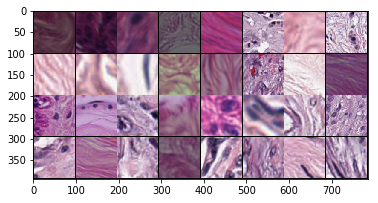

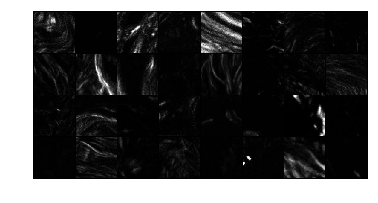

In [7]:
# TODO: insert back mean and variance to plot the image appropriately
dt.show_patch(dataloader) 

In [8]:
print('===> Building model')
model = md.Net().to(device)
criterionMSE = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)


===> Building model


In [11]:
def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(dataloader):
        input, target = batch['input'].to(device), batch['output'].to(device)

        optimizer.zero_grad()
        output = model(input)
        targetf = target.float()
        targetf = targetf[:, None]
        
        lossMSE = criterionMSE(output, targetf)      
        lossSSIM = 1-ssim(output, targetf)
        
        p = 0.75
        loss = p*lossMSE + (1-p)*lossSSIM
        combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
        
        epoch_loss = epoch_loss + combineLoss
        loss.backward()
        optimizer.step()
    
        if iteration%50 == 0:
            print("lossMSE: " + str(lossMSE.item()) +
                  " " + "lossSSIM: " + str(lossSSIM.item()))
            print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(dataloader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(dataloader)))


In [ ]:
# def test():
#     avg_psnr = 0
#     with torch.no_grad():
#         for batch in testing_data_loader:
#             input, target = batch[0].to(device), batch[1].to(device)

#             prediction = model(input)
#             mse = criterion(prediction, target)
#             psnr = 10 * log10(1 / mse.item())
#             avg_psnr += psnr
#     print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(testing_data_loader)))


In [ ]:
# def checkpoint(epoch):
#     model_out_path = "model_epoch_{}.pth".format(epoch)
#     torch.save(model, model_out_path)
#     print("Checkpoint saved to {}".format(model_out_path))

In [ ]:
for epoch in range(1, 5 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)

lossMSE: 0.2236083298921585 lossSSIM: 0.9521285891532898
===> Epoch[1](0/25343): Loss: 0.4057
lossMSE: 0.22643481194972992 lossSSIM: 0.9551966190338135
===> Epoch[1](50/25343): Loss: 0.4086
lossMSE: 0.2193039357662201 lossSSIM: 0.9519645571708679
===> Epoch[1](100/25343): Loss: 0.4025
lossMSE: 0.2190506011247635 lossSSIM: 0.9496465921401978
===> Epoch[1](150/25343): Loss: 0.4017
lossMSE: 0.2177480310201645 lossSSIM: 0.9515767693519592
===> Epoch[1](200/25343): Loss: 0.4012
lossMSE: 0.20641782879829407 lossSSIM: 0.9386119842529297
===> Epoch[1](250/25343): Loss: 0.3895
lossMSE: 0.2131938338279724 lossSSIM: 0.9519171118736267
===> Epoch[1](300/25343): Loss: 0.3979
lossMSE: 0.2124307006597519 lossSSIM: 0.9516014456748962
===> Epoch[1](350/25343): Loss: 0.3972
lossMSE: 0.2133532166481018 lossSSIM: 0.9542365074157715
===> Epoch[1](400/25343): Loss: 0.3986
lossMSE: 0.2092287391424179 lossSSIM: 0.9485486745834351
===> Epoch[1](450/25343): Loss: 0.3941
lossMSE: 0.21059627830982208 lossSSIM: 0.

lossMSE: 0.13670922815799713 lossSSIM: 0.9393953680992126
===> Epoch[1](4250/25343): Loss: 0.3374
lossMSE: 0.13267141580581665 lossSSIM: 0.9376250505447388
===> Epoch[1](4300/25343): Loss: 0.3339
lossMSE: 0.13077574968338013 lossSSIM: 0.9242864847183228
===> Epoch[1](4350/25343): Loss: 0.3292
lossMSE: 0.13244499266147614 lossSSIM: 0.932690441608429
===> Epoch[1](4400/25343): Loss: 0.3325
lossMSE: 0.13878054916858673 lossSSIM: 0.9471837878227234
===> Epoch[1](4450/25343): Loss: 0.3409
lossMSE: 0.1291639506816864 lossSSIM: 0.9310170412063599
===> Epoch[1](4500/25343): Loss: 0.3296
lossMSE: 0.12972848117351532 lossSSIM: 0.9338974356651306
===> Epoch[1](4550/25343): Loss: 0.3308
lossMSE: 0.1363593488931656 lossSSIM: 0.948695182800293
===> Epoch[1](4600/25343): Loss: 0.3394
lossMSE: 0.12712505459785461 lossSSIM: 0.9296424388885498
===> Epoch[1](4650/25343): Loss: 0.3278
lossMSE: 0.12911218404769897 lossSSIM: 0.940505862236023
===> Epoch[1](4700/25343): Loss: 0.3320
lossMSE: 0.12383101880550

lossMSE: 0.08005616068840027 lossSSIM: 0.92084801197052
===> Epoch[1](8450/25343): Loss: 0.2903
lossMSE: 0.08186832070350647 lossSSIM: 0.927537739276886
===> Epoch[1](8500/25343): Loss: 0.2933
lossMSE: 0.07991956174373627 lossSSIM: 0.9171780943870544
===> Epoch[1](8550/25343): Loss: 0.2892
lossMSE: 0.07648035883903503 lossSSIM: 0.9098098278045654
===> Epoch[1](8600/25343): Loss: 0.2848
lossMSE: 0.0791129469871521 lossSSIM: 0.9119542837142944
===> Epoch[1](8650/25343): Loss: 0.2873
lossMSE: 0.07959481328725815 lossSSIM: 0.9217629432678223
===> Epoch[1](8700/25343): Loss: 0.2901
lossMSE: 0.0790601596236229 lossSSIM: 0.9221605658531189
===> Epoch[1](8750/25343): Loss: 0.2898
lossMSE: 0.07533227652311325 lossSSIM: 0.9094471335411072
===> Epoch[1](8800/25343): Loss: 0.2839
lossMSE: 0.07549329847097397 lossSSIM: 0.9226122498512268
===> Epoch[1](8850/25343): Loss: 0.2873
lossMSE: 0.07622328400611877 lossSSIM: 0.9108262062072754
===> Epoch[1](8900/25343): Loss: 0.2849
lossMSE: 0.07316195964813

lossMSE: 0.045732464641332626 lossSSIM: 0.8886842727661133
===> Epoch[1](12650/25343): Loss: 0.2565
lossMSE: 0.04733969271183014 lossSSIM: 0.8978765606880188
===> Epoch[1](12700/25343): Loss: 0.2600
lossMSE: 0.0423714853823185 lossSSIM: 0.8759424090385437
===> Epoch[1](12750/25343): Loss: 0.2508
lossMSE: 0.04442284628748894 lossSSIM: 0.8872299790382385
===> Epoch[1](12800/25343): Loss: 0.2551
lossMSE: 0.04625470191240311 lossSSIM: 0.8943043947219849
===> Epoch[1](12850/25343): Loss: 0.2583
lossMSE: 0.043292202055454254 lossSSIM: 0.8822076320648193
===> Epoch[1](12900/25343): Loss: 0.2530
lossMSE: 0.04374659061431885 lossSSIM: 0.8919510245323181
===> Epoch[1](12950/25343): Loss: 0.2558
lossMSE: 0.04116857051849365 lossSSIM: 0.8809995651245117
===> Epoch[1](13000/25343): Loss: 0.2511
lossMSE: 0.044537562876939774 lossSSIM: 0.9020398259162903
===> Epoch[1](13050/25343): Loss: 0.2589
lossMSE: 0.04080763831734657 lossSSIM: 0.864517092704773
===> Epoch[1](13100/25343): Loss: 0.2467
lossMSE: 

lossMSE: 0.02904576063156128 lossSSIM: 0.8771364688873291
===> Epoch[1](16800/25343): Loss: 0.2411
lossMSE: 0.025524752214550972 lossSSIM: 0.8375843167304993
===> Epoch[1](16850/25343): Loss: 0.2285
lossMSE: 0.025828015059232712 lossSSIM: 0.8410090208053589
===> Epoch[1](16900/25343): Loss: 0.2296
lossMSE: 0.02520345151424408 lossSSIM: 0.8527064919471741
===> Epoch[1](16950/25343): Loss: 0.2321
lossMSE: 0.024990541860461235 lossSSIM: 0.863754391670227
===> Epoch[1](17000/25343): Loss: 0.2347
lossMSE: 0.02840331941843033 lossSSIM: 0.839538037776947
===> Epoch[1](17050/25343): Loss: 0.2312
lossMSE: 0.03213782608509064 lossSSIM: 0.870921790599823
===> Epoch[1](17100/25343): Loss: 0.2418
lossMSE: 0.02588384598493576 lossSSIM: 0.8750680685043335
===> Epoch[1](17150/25343): Loss: 0.2382
lossMSE: 0.024070754647254944 lossSSIM: 0.8333703279495239
===> Epoch[1](17200/25343): Loss: 0.2264
lossMSE: 0.024234257638454437 lossSSIM: 0.8243420124053955
===> Epoch[1](17250/25343): Loss: 0.2243
lossMSE:

lossMSE: 0.016486169770359993 lossSSIM: 0.7503995895385742
===> Epoch[1](20950/25343): Loss: 0.2000
lossMSE: 0.016962263733148575 lossSSIM: 0.8046496510505676
===> Epoch[1](21000/25343): Loss: 0.2139
lossMSE: 0.020596930757164955 lossSSIM: 0.7519906759262085
===> Epoch[1](21050/25343): Loss: 0.2034
lossMSE: 0.01869705691933632 lossSSIM: 0.8084458112716675
===> Epoch[1](21100/25343): Loss: 0.2161
lossMSE: 0.01929977349936962 lossSSIM: 0.7935781478881836
===> Epoch[1](21150/25343): Loss: 0.2129
lossMSE: 0.016350699588656425 lossSSIM: 0.7797596454620361
===> Epoch[1](21200/25343): Loss: 0.2072
lossMSE: 0.018312828615307808 lossSSIM: 0.7775135636329651
===> Epoch[1](21250/25343): Loss: 0.2081
lossMSE: 0.016913142055273056 lossSSIM: 0.7475007176399231
===> Epoch[1](21300/25343): Loss: 0.1996
lossMSE: 0.016649482771754265 lossSSIM: 0.7253667116165161
===> Epoch[1](21350/25343): Loss: 0.1938
lossMSE: 0.01588626205921173 lossSSIM: 0.7543613910675049
===> Epoch[1](21400/25343): Loss: 0.2005
los

lossMSE: 0.014419879764318466 lossSSIM: 0.640129804611206
===> Epoch[1](25100/25343): Loss: 0.1708
lossMSE: 0.0158570297062397 lossSSIM: 0.6841727495193481
===> Epoch[1](25150/25343): Loss: 0.1829
lossMSE: 0.013970481231808662 lossSSIM: 0.6689863204956055
===> Epoch[1](25200/25343): Loss: 0.1777
lossMSE: 0.013557087630033493 lossSSIM: 0.6687588095664978
===> Epoch[1](25250/25343): Loss: 0.1774
lossMSE: 0.013608871959149837 lossSSIM: 0.6435325145721436
===> Epoch[1](25300/25343): Loss: 0.1711
===> Epoch 1 Complete: Avg. Loss: 0.2686
lossMSE: 0.014305021613836288 lossSSIM: 0.6639020442962646
===> Epoch[2](0/25343): Loss: 0.1767
lossMSE: 0.013263351283967495 lossSSIM: 0.648558497428894
===> Epoch[2](50/25343): Loss: 0.1721
lossMSE: 0.013801191933453083 lossSSIM: 0.6524527072906494
===> Epoch[2](100/25343): Loss: 0.1735
lossMSE: 0.012776627205312252 lossSSIM: 0.6505331993103027
===> Epoch[2](150/25343): Loss: 0.1722
lossMSE: 0.013698760420084 lossSSIM: 0.6200186014175415
===> Epoch[2](200/

lossMSE: 0.014354228973388672 lossSSIM: 0.5108766555786133
===> Epoch[2](3900/25343): Loss: 0.1385
lossMSE: 0.012409135699272156 lossSSIM: 0.5210134983062744
===> Epoch[2](3950/25343): Loss: 0.1396
lossMSE: 0.01248917356133461 lossSSIM: 0.5273481607437134
===> Epoch[2](4000/25343): Loss: 0.1412
lossMSE: 0.015621500089764595 lossSSIM: 0.5231768488883972
===> Epoch[2](4050/25343): Loss: 0.1425
lossMSE: 0.0138079933822155 lossSSIM: 0.5357787609100342
===> Epoch[2](4100/25343): Loss: 0.1443
lossMSE: 0.013485321775078773 lossSSIM: 0.5361129641532898
===> Epoch[2](4150/25343): Loss: 0.1441
lossMSE: 0.013523982837796211 lossSSIM: 0.5028262734413147
===> Epoch[2](4200/25343): Loss: 0.1358
lossMSE: 0.013852808624505997 lossSSIM: 0.520383358001709
===> Epoch[2](4250/25343): Loss: 0.1405
lossMSE: 0.013120346702635288 lossSSIM: 0.5126024484634399
===> Epoch[2](4300/25343): Loss: 0.1380
lossMSE: 0.01524224504828453 lossSSIM: 0.524026095867157
===> Epoch[2](4350/25343): Loss: 0.1424
lossMSE: 0.01515

lossMSE: 0.012590880505740643 lossSSIM: 0.4526217579841614
===> Epoch[2](8050/25343): Loss: 0.1226
lossMSE: 0.014447029680013657 lossSSIM: 0.4551613926887512
===> Epoch[2](8100/25343): Loss: 0.1246
lossMSE: 0.01039397157728672 lossSSIM: 0.41343873739242554
===> Epoch[2](8150/25343): Loss: 0.1112
lossMSE: 0.009992185980081558 lossSSIM: 0.4280949831008911
===> Epoch[2](8200/25343): Loss: 0.1145
lossMSE: 0.01074473187327385 lossSSIM: 0.41449427604675293
===> Epoch[2](8250/25343): Loss: 0.1117
lossMSE: 0.010604116134345531 lossSSIM: 0.4126567840576172
===> Epoch[2](8300/25343): Loss: 0.1111
lossMSE: 0.01274462416768074 lossSSIM: 0.43424683809280396
===> Epoch[2](8350/25343): Loss: 0.1181
lossMSE: 0.010416613891720772 lossSSIM: 0.4218027591705322
===> Epoch[2](8400/25343): Loss: 0.1133
lossMSE: 0.015206413343548775 lossSSIM: 0.43042469024658203
===> Epoch[2](8450/25343): Loss: 0.1190
lossMSE: 0.011771542020142078 lossSSIM: 0.4412039518356323
===> Epoch[2](8500/25343): Loss: 0.1191
lossMSE: 

lossMSE: 0.00795714557170868 lossSSIM: 0.34654831886291504
===> Epoch[2](12200/25343): Loss: 0.0926
lossMSE: 0.00708944583311677 lossSSIM: 0.3674570322036743
===> Epoch[2](12250/25343): Loss: 0.0972
lossMSE: 0.010632402263581753 lossSSIM: 0.35085779428482056
===> Epoch[2](12300/25343): Loss: 0.0957
lossMSE: 0.007187697570770979 lossSSIM: 0.353030264377594
===> Epoch[2](12350/25343): Loss: 0.0936
lossMSE: 0.007033708970993757 lossSSIM: 0.3500668406486511
===> Epoch[2](12400/25343): Loss: 0.0928
lossMSE: 0.009775987826287746 lossSSIM: 0.3845157027244568
===> Epoch[2](12450/25343): Loss: 0.1035
lossMSE: 0.006129915826022625 lossSSIM: 0.3630755543708801
===> Epoch[2](12500/25343): Loss: 0.0954
lossMSE: 0.010115615092217922 lossSSIM: 0.3563000559806824
===> Epoch[2](12550/25343): Loss: 0.0967
lossMSE: 0.010204918682575226 lossSSIM: 0.35118311643600464
===> Epoch[2](12600/25343): Loss: 0.0954
lossMSE: 0.00995582528412342 lossSSIM: 0.3541443943977356
===> Epoch[2](12650/25343): Loss: 0.0960
l

lossMSE: 0.0046984064392745495 lossSSIM: 0.3129519820213318
===> Epoch[2](16300/25343): Loss: 0.0818
lossMSE: 0.006114736199378967 lossSSIM: 0.2974774241447449
===> Epoch[2](16350/25343): Loss: 0.0790
lossMSE: 0.007160615641623735 lossSSIM: 0.2647779583930969
===> Epoch[2](16400/25343): Loss: 0.0716
lossMSE: 0.005751582328230143 lossSSIM: 0.2849356532096863
===> Epoch[2](16450/25343): Loss: 0.0755
lossMSE: 0.007176028564572334 lossSSIM: 0.2841693162918091
===> Epoch[2](16500/25343): Loss: 0.0764
lossMSE: 0.005781001411378384 lossSSIM: 0.30222511291503906
===> Epoch[2](16550/25343): Loss: 0.0799
lossMSE: 0.006231376901268959 lossSSIM: 0.2923816442489624
===> Epoch[2](16600/25343): Loss: 0.0778
lossMSE: 0.00949754286557436 lossSSIM: 0.33905982971191406
===> Epoch[2](16650/25343): Loss: 0.0919
lossMSE: 0.006078111007809639 lossSSIM: 0.3097380995750427
===> Epoch[2](16700/25343): Loss: 0.0820
lossMSE: 0.014982400462031364 lossSSIM: 0.3522590398788452
===> Epoch[2](16750/25343): Loss: 0.099

In [ ]:
import matplotlib.pyplot as plt
from torchvision import transforms, utils
def test():
    avg_psnr = 0
    with torch.no_grad():
        for iteration, batch in enumerate(dataloader):
            input, target = batch['input'].to(device), batch['output'].to(device)
                
            prediction = model(input)

            target = target.float()

            outdataloader = {'input':prediction,'output':target}
            
            print(outdataloader['input'].size(), 
                      outdataloader['output'].size())

            plt.figure()
            input_batch, label_batch = outdataloader['input'], outdataloader['output']
            batch_size = 32
            im_size = input_batch.size(2)
            label_batch=label_batch.reshape([batch_size,1,im_size,im_size])
            print(label_batch.size())
            for img in input_batch:
                for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
                    t.mul_(s).add_(m)
                            
            for img in label_batch:
                for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
                    t.mul_(s).add_(m)                           

            grid = utils.make_grid(input_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))
            plt.figure()

            grid = utils.make_grid(label_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))

            plt.axis('off')
            plt.ioff()
            plt.show()
            
            targetf = target[:, None]
            
            lossMSE = criterionMSE(prediction, targetf)      
            lossSSIM = -ssim(prediction, targetf)
        
            p = 0.25
            loss = p*lossMSE + (1-p)*lossSSIM
            combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
#             mse = criterion(prediction, target.float())

            psnr = 10 * torch.log10(1 / loss)
            avg_psnr += psnr
            if iteration == 16:
                break
    print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(dataloader)))

In [ ]:
test()